In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2015-01-01'
end = '2022-04-11'
df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.714512
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.018259
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.020521
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.357344
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.293207


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-05,178.300003,174.419998,177.500000,175.059998,73401800.0,175.059998
2022-04-06,173.630005,170.130005,172.360001,171.830002,89058800.0,171.830002
2022-04-07,173.360001,169.850006,171.160004,172.139999,77594700.0,172.139999
2022-04-08,171.779999,169.199997,171.779999,170.089996,76515900.0,170.089996
2022-04-11,169.020004,165.729996,168.710007,165.789993,58090621.0,165.789993


In [4]:
df=df.reset_index()

In [5]:
df = df.drop(['Date','Adj Close'], axis = 1)

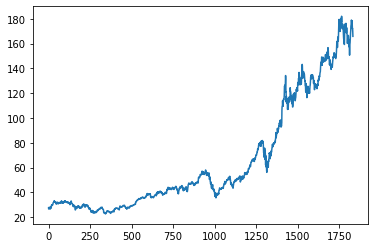

In [6]:
plt.plot(df.Close)

In [7]:
ma50 = df.Close.rolling(50).mean()
ma50

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1827    167.610401
1828    167.851401
1829    168.100401
1830    168.317801
1831    168.227000
Name: Close, Length: 1832, dtype: float64

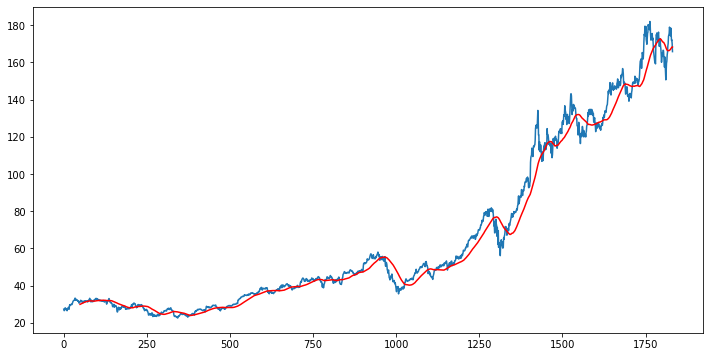

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma50,'r')

In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1827    168.096001
1828    168.335601
1829    168.557101
1830    168.758000
1831    168.905900
Name: Close, Length: 1832, dtype: float64

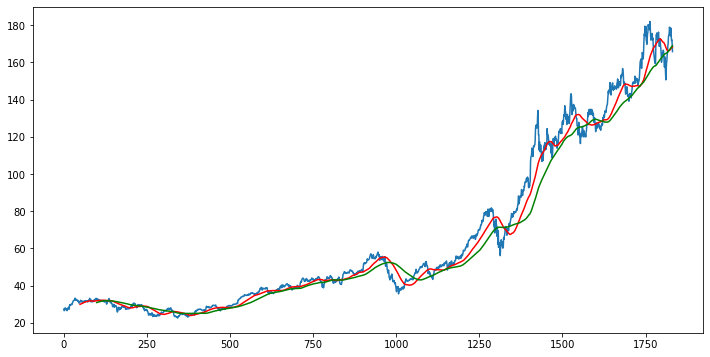

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma50,'r')
plt.plot(ma100,'g')

In [11]:
df.shape

(1832, 5)

In [12]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1282, 1)
(550, 1)


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.08115387],
       [0.06799147],
       [0.06803421],
       ...,
       [0.93299148],
       [0.9765385 ],
       [0.98764964]])

In [15]:
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [17]:
model = Sequential()
model.add(LSTM(units=50,activation = 'relu',return_sequences=True,
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation = 'relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation = 'relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [19]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
37/37 [==============================] - 7s 119ms/step - loss: 0.0329
Epoch 2/50
37/37 [==============================] - 4s 119ms/step - loss: 0.0062
Epoch 3/50
37/37 [==============================] - 4s 111ms/step - loss: 0.0050
Epoch 4/50
37/37 [==============================] - 4s 112ms/step - loss: 0.0051
Epoch 5/50
37/37 [==============================] - 4s 113ms/step - loss: 0.0049
Epoch 6/50
37/37 [==============================] - 4s 109ms/step - loss: 0.0046
Epoch 7/50
37/37 [==============================] - 4s 109ms/step - loss: 0.0039
Epoch 8/50
37/37 [==============================] - 4s 111ms/step - loss: 0.0045
Epoch 9/50
37/37 [==============================] - 4s 111ms/step - loss: 0.0046
Epoch 10/50
37/37 [==============================] - 4s 111ms/step - loss: 0.0037
Epoch 11/50
37/37 [==============================] - 4s 112ms/step - loss: 0.0043
Epoch 12/50
37/37 [==============================] - 4s 111ms/step - loss: 0.0047
Epoch 13/50
37/37 [======

In [21]:
data_training.tail(100)

,Close
1182,54.687500
1183,54.974998
1184,55.174999
1185,55.692501
1186,55.240002
...,...
1277,80.967499
1278,77.377502
1279,77.165001
1280,79.712502


In [22]:
past_100_days = data_training.tail(100)

In [24]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [25]:
input_data = scaler.fit_transform(final_df)
input_data

array([[2.09657370e-03],
       [4.34987320e-03],
       [5.91740019e-03],
       [9.97337515e-03],
       [6.42686365e-03],
       [9.79760428e-05],
       [2.03779406e-03],
       [0.00000000e+00],
       [6.56400619e-03],
       [4.33028995e-03],
       [2.23374614e-03],
       [1.23246507e-02],
       [1.35394699e-02],
       [2.50806112e-03],
       [6.15254867e-03],
       [1.82812174e-02],
       [1.83791934e-02],
       [1.31671789e-02],
       [1.83204138e-02],
       [2.43161769e-02],
       [3.63077329e-02],
       [3.56415138e-02],
       [3.45638670e-02],
       [3.27024119e-02],
       [3.44854742e-02],
       [3.66996072e-02],
       [4.47331344e-02],
       [4.36554877e-02],
       [4.99647322e-02],
       [5.07485107e-02],
       [5.66267144e-02],
       [6.14664380e-02],
       [5.01802675e-02],
       [5.01214879e-02],
       [6.08981948e-02],
       [7.47315929e-02],
       [7.80233727e-02],
       [7.72984038e-02],
       [7.75139092e-02],
       [8.18050027e-02],


In [26]:
input_data.shape

(650, 1)

In [27]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [28]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(550, 100, 1)
(550,)


In [29]:
y_predicted = model.predict(x_test)

In [30]:
y_predicted.shape

(550, 1)

In [31]:
y_test

array([0.21069442, 0.20054473, 0.203523  , 0.19972176, 0.21459366,
       0.21002823, 0.21018501, 0.19852655, 0.20757897, 0.20107375,
       0.18686809, 0.1577318 , 0.13794184, 0.14689632, 0.10941296,
       0.10909945, 0.15896623, 0.14037154, 0.16666667, 0.14742539,
       0.13980329, 0.09501141, 0.1325731 , 0.11315542, 0.05985971,
       0.11813232, 0.04806414, 0.06893175, 0.05680305, 0.05309979,
       0.0226507 , 0.0131084 , 0.05721454, 0.05454975, 0.07986521,
       0.05889963, 0.07275258, 0.07173368, 0.04551691, 0.05339368,
       0.04649661, 0.0877616 , 0.081805  , 0.09481546, 0.09857747,
       0.10888394, 0.13592366, 0.13079003, 0.1352183 , 0.1275962 ,
       0.11609452, 0.09932205, 0.11446825, 0.11237167, 0.12792933,
       0.12832123, 0.11932752, 0.13725609, 0.14914961, 0.13988168,
       0.14789563, 0.15651698, 0.16253236, 0.16862607, 0.18114667,
       0.19070856, 0.1836547 , 0.17628733, 0.17999063, 0.17640489,
       0.19061055, 0.18704449, 0.19897723, 0.19431385, 0.19831

In [32]:
y_predicted

array([[0.21353918],
       [0.21338956],
       [0.21346998],
       [0.2138339 ],
       [0.21444437],
       [0.21532917],
       [0.21644959],
       [0.21774557],
       [0.21906064],
       [0.22027902],
       [0.22126934],
       [0.22182435],
       [0.2214753 ],
       [0.21979056],
       [0.21668749],
       [0.21165757],
       [0.20437899],
       [0.1954597 ],
       [0.18585478],
       [0.17684013],
       [0.16926654],
       [0.16339424],
       [0.1587508 ],
       [0.15511025],
       [0.1521048 ],
       [0.14889929],
       [0.14529443],
       [0.14076261],
       [0.13507968],
       [0.12819918],
       [0.12024723],
       [0.11129479],
       [0.10144819],
       [0.09155887],
       [0.08263713],
       [0.07570393],
       [0.07122049],
       [0.06928682],
       [0.06978111],
       [0.07219987],
       [0.07584027],
       [0.07990499],
       [0.08401343],
       [0.08804879],
       [0.09208846],
       [0.0962808 ],
       [0.10079592],
       [0.105

In [33]:
scaler.scale_

array([0.00783761])

In [34]:
scale_factor = 1/0.00783761
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

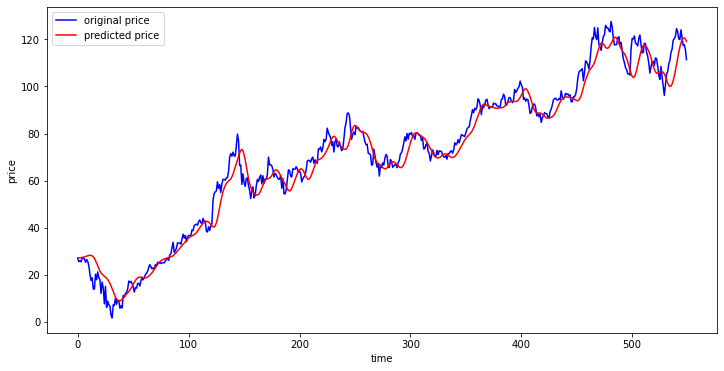

In [36]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='original price')
plt.plot(y_predicted,'r',label='predicted price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()